# Import

In [2]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from qick import *
from qick.helpers import gauss
from tqdm import tqdm_notebook as tqdm

import time
import os
import sys
sys.path.append('/home/xilinx/jupyter_notebooks/')
sys.path.append('C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts')
sys.path.append(r'C:\Users\cnhaj\Code')

import scipy as sp
import json
from scipy.fft import fft, fftfreq

# from slab.instruments import *
from slab.experiment import Experiment
from slab.datamanagement import SlabFile
from slab import get_next_filename, AttrDict
from slab import Experiment, dsfit, AttrDict

# Figure params
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 14})

In [3]:
from slab.dsfit import *
import os
from scipy.interpolate import griddata
from numpy import mgrid, array, zeros,abs,pi,cos,transpose, linspace
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from tempfile import TemporaryFile
# font = {'family' : 'DejaVu Sans',
#         'weight' : 'normal',
#         'size'   : 15}
import json
from h5py import File
from datetime import datetime
import time
from slab.datamanagement import SlabFile
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from slab.dsfit import *
from scipy.optimize import curve_fit
# import experiments.fitting as fitter
from matplotlib.colors import Normalize

# Function used in experiment

In [4]:
import sys

# Path to add
path_candidates = [
    'C:\\_Lib\\python\\multimode_expts',
    r'C:\Users\cnhaj\Code\multimode_expts',
    '/Users/wgz/Code/multimode_expts',
]
for expts_path in path_candidates:
    if os.path.exists(expts_path):
        break

# Add the path to the system path at the highest priority
if expts_path not in sys.path:
    sys.path.insert(0, expts_path)
    print('Path added at highest priority')

# Verify the path is added
print(sys.path)


Path added at highest priority
['/Users/wgz/Code/multimode_expts', '/Users/wgz/Code', '/Users/wgz/anaconda3/envs/slab/lib/python311.zip', '/Users/wgz/anaconda3/envs/slab/lib/python3.11', '/Users/wgz/anaconda3/envs/slab/lib/python3.11/lib-dynload', '', '/Users/wgz/anaconda3/envs/slab/lib/python3.11/site-packages', '/Users/wgz/Code/maskLib/src', '/home/xilinx/jupyter_notebooks/', 'C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts', 'C:\\Users\\cnhaj\\Code', '/home/xilinx/jupyter_notebooks/', 'C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts', 'C:\\Users\\cnhaj\\Code']


In [6]:
from multimode_expts.fit_display import *

importing from path  /Users/wgz/Code/multimode_expts/experiments/single_qubit
imported experiments.single_qubit.sideband_t1_general
imported experiments.single_qubit.amplitude_rabi_ef
imported experiments.single_qubit.amplitude_rabi_f0g1_general
imported experiments.single_qubit.parity_freq
imported experiments.single_qubit.parity_gain
imported experiments.single_qubit.length_rabi_f0g1_general
imported experiments.single_qubit.active_reset_single_shot
imported experiments.single_qubit.t2_echo
imported experiments.single_qubit.rf_flux_spectroscopy_f0g1
imported experiments.single_qubit.square_pulse
imported experiments.single_qubit.t1
imported experiments.single_qubit.t1_fluxonium
imported experiments.single_qubit.parity_measurement_temp
imported experiments.single_qubit.rbam
imported experiments.single_qubit.ramsey_ef
imported experiments.single_qubit.dragpulse_calibration
imported experiments.single_qubit.rb_BSgate
imported experiments.single_qubit.parity_delay
imported experiments.si

In [7]:
import experiments.fitting as fitter
from numpy.linalg import inv

In [8]:
from qick.helpers import cosine

# Experiment data file path

In [9]:

# print("path: ", path)

"""Reopen saved data"""
def prev_data(expt_path, filename):
    temp_data_file = os.path.join(expt_path, filename)
    with SlabFile(temp_data_file) as a:
        attrs = dict()
        for key in list(a.attrs):
            attrs.update({key:json.loads(a.attrs[key])})
        keys = list(a)
        temp_data = dict()
        for key in keys:
            temp_data.update({key:np.array(a[key])})
        # print(f'Extracted data and attrs {list(a.attrs)}')
    return temp_data, attrs

slab_Gdrive_candidates = [
    r'H:\Shared drives\SLab',
    r'G:\Shared drives\SLab',
    '/Users/wgz/Library/CloudStorage/GoogleDrive-gzhwang@stanford.edu/Shared drives/SLab',
]
for slab_loc in slab_Gdrive_candidates:
    if os.path.exists(slab_loc):
        break
parent_path = os.path.join(slab_loc, 'Multimode', 'experiment')

expt_path = os.path.join(parent_path, '250812_qsim', 'data')
print('Data are extracted from', expt_path)

Data are extracted from /Users/wgz/Library/CloudStorage/GoogleDrive-gzhwang@stanford.edu/Shared drives/SLab/Multimode/experiment/250812_qsim/data


# Dataset

In [10]:
from dataset import *
from dataset import storage_man_swap_dataset
import os 

file_path = os.path.join(expts_path, 'man1_storage_swap_dataset.csv')
# print(os.makedirs(file_path, exist_ok=True))
ds = storage_man_swap_dataset(file_path)

In [11]:
ds.df

,stor_name,freq (MHz),precision (MHz),pi (mus),h_pi (mus),gain (DAC units),last_update
0,M1-S1,348.705722,NaN,1.209192,0.604596,2977,2025-08-18 17:09:22.472298
1,M1-S2,520.119712,NaN,1.157138,0.578569,4765,2025-08-18 17:09:22.478282
2,M1-S3,695.791320,NaN,1.057229,0.528615,4883,2025-08-18 17:09:22.486261
3,M1-S4,873.467193,NaN,1.002202,0.501101,9080,2025-08-18 17:17:21.751136
4,M1-S5,1052.583825,NaN,1.838050,0.919025,7115,2025-08-18 17:09:22.493242
5,M1-S6,1244.545889,NaN,1.359600,0.679800,13375,2025-08-18 17:09:22.500224
6,M1-S7,1422.176794,NaN,2.416182,1.208091,9522,2025-08-18 17:09:22.507236
7,M1-S8,-1.000000,-1.00,-1.000000,-1.000000,-1,51:31.3
8,M1-S9,-1.000000,-1.00,-1.000000,-1.000000,-1,51:31.3
9,M1-S10,-1.000000,-1.00,-1.000000,-1.000000,-1,51:31.3


In [12]:
list(ds.df['freq (MHz)'][1:7])

[520.1197117339476,
 695.7913204550518,
 873.4671925234683,
 1052.5838248532457,
 1244.5458886228885,
 1422.176794171707]

In [13]:
list(ds.df['gain (DAC units)'][1:7])

[4765, 4883, 9080, 7115, 13375, 9522]

# Actual experiment data

## Early random scrambling

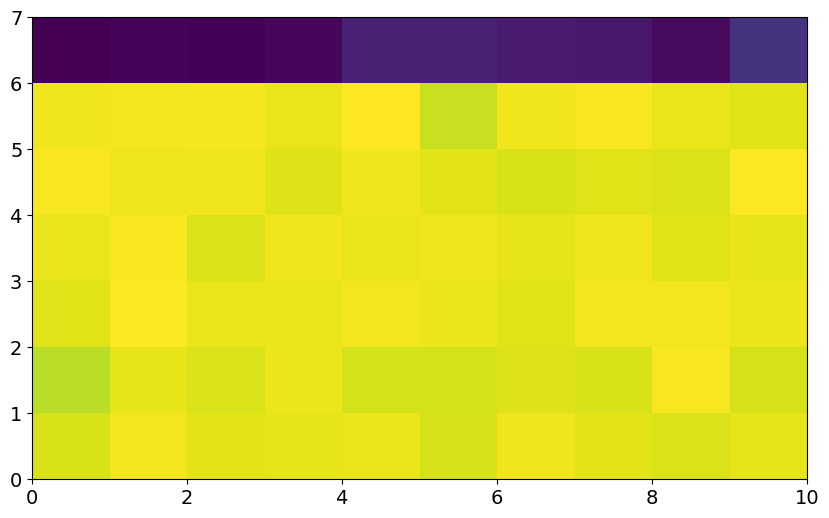

In [9]:
all_amps = []

for id in range(20,30):
    temp_data, attrs = prev_data(expt_path, f'00{id:03d}_storage_sweep.h5')
    all_amps.append(temp_data['amps'])


all_amps = np.array(all_amps)


plt.pcolormesh(all_amps[:,6,:].T, cmap='viridis')


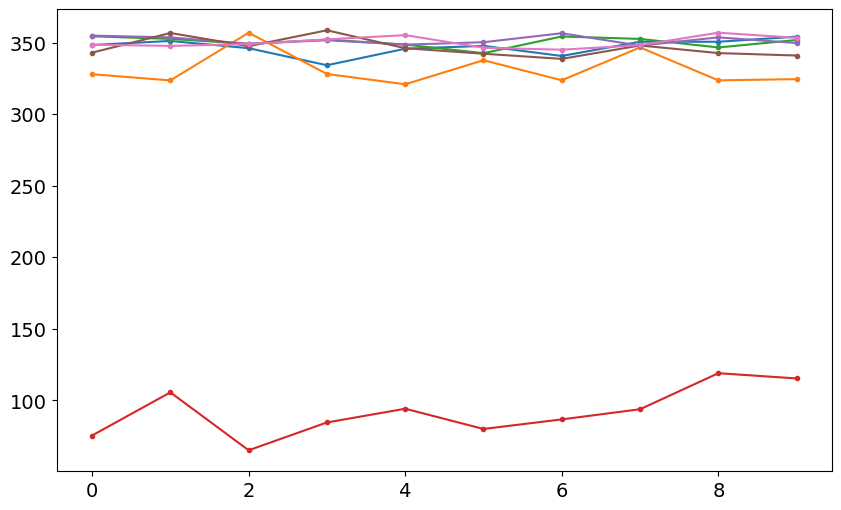

In [21]:
for kk in range(7):
    plt.plot(all_amps[:,3,kk], marker='.')

## Sideband chevron

In [37]:
temp_data, attrs = prev_data(expt_path, f'00000_SidebandChevron_M1S7.h5')

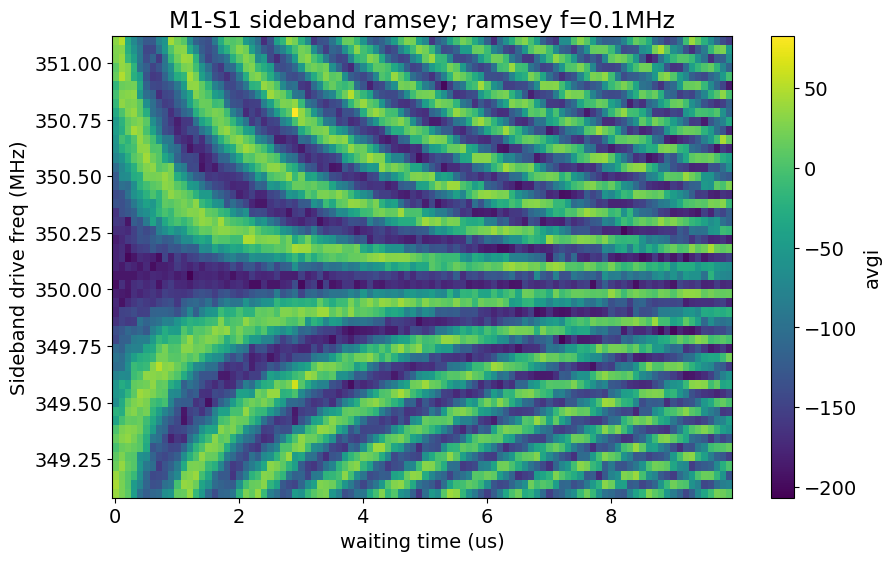

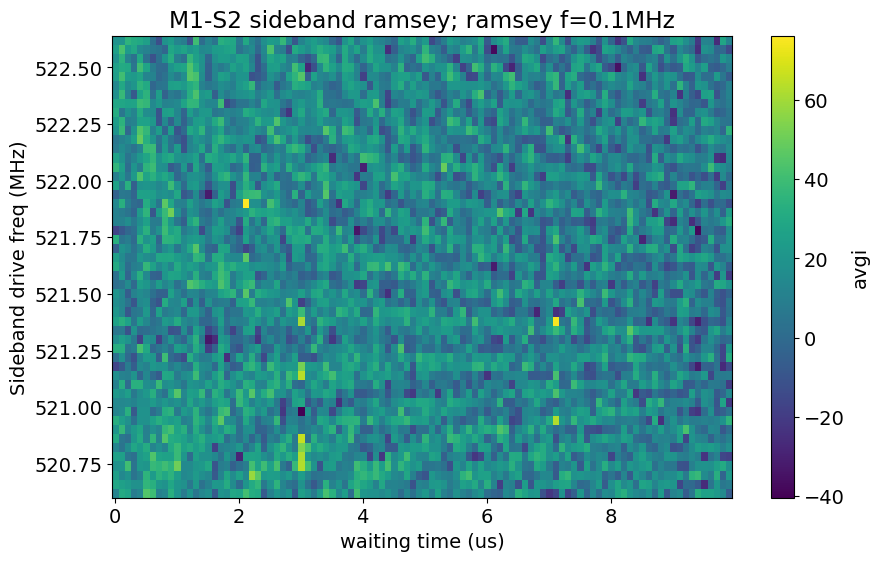

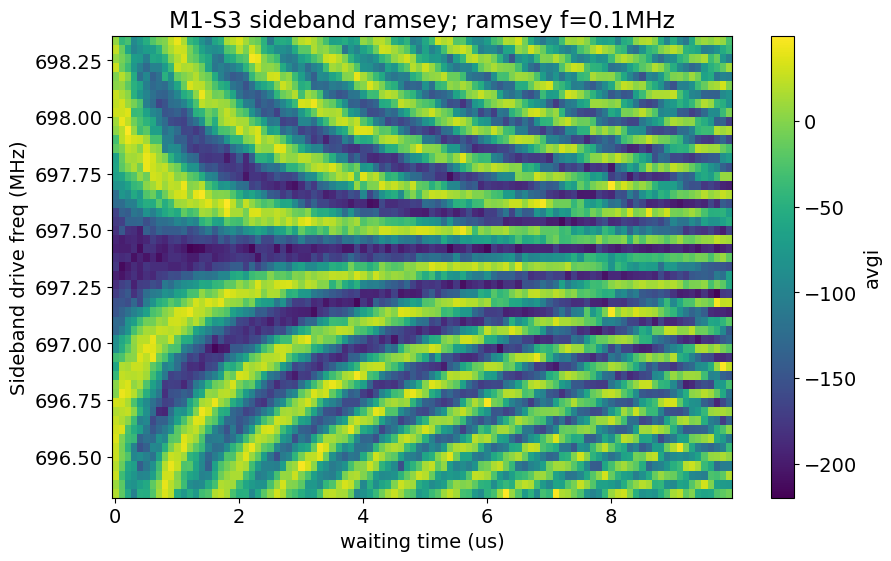

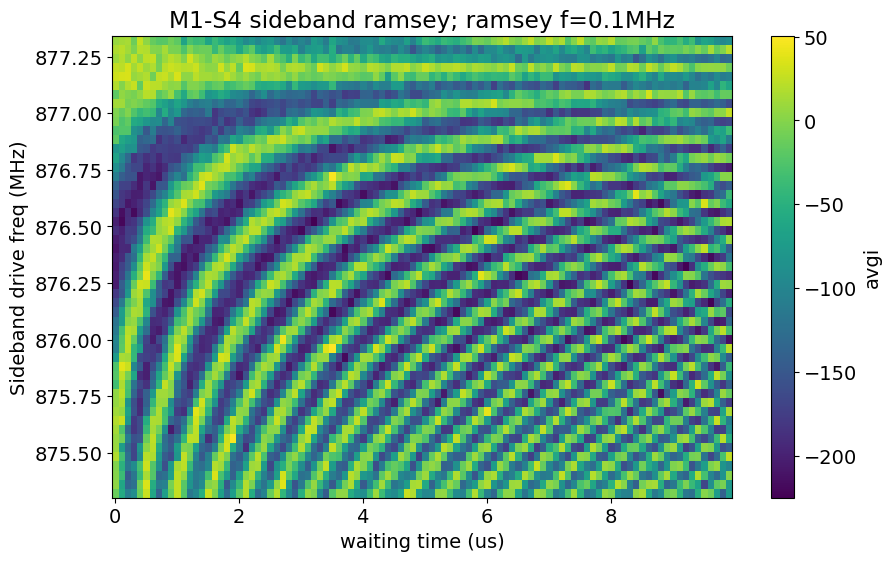

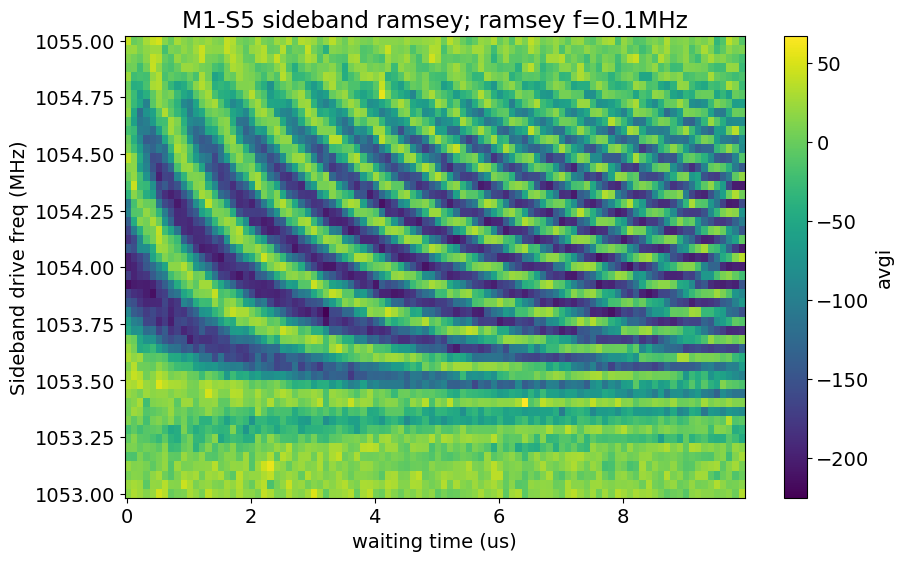

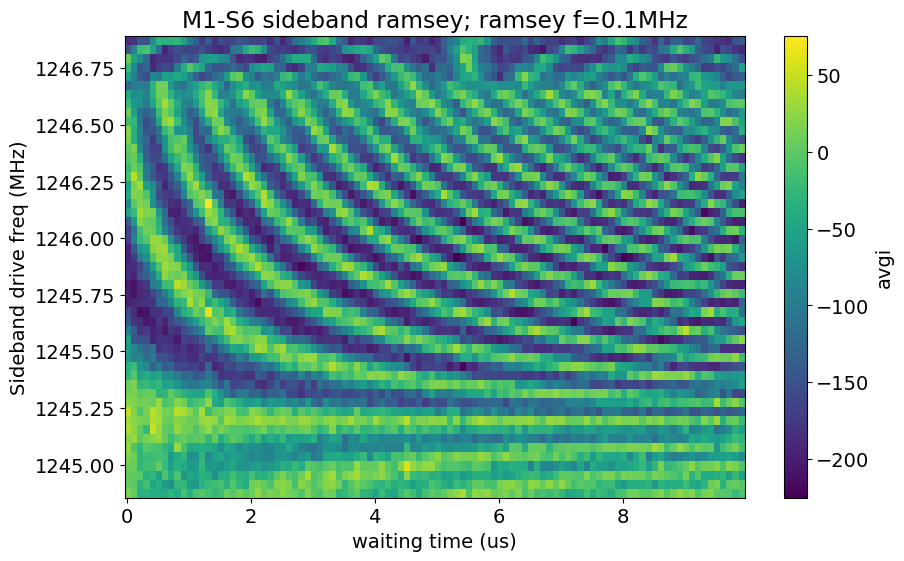

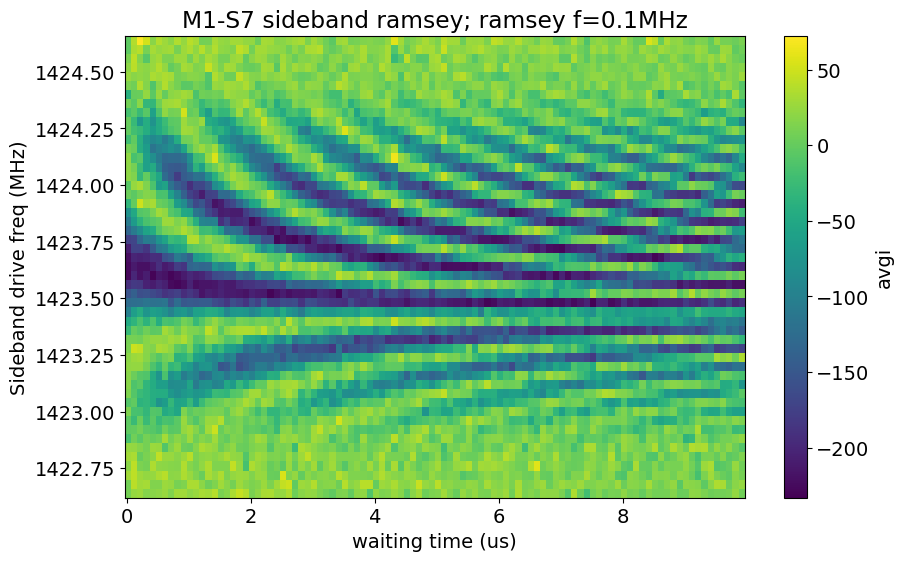

In [39]:
stor_no = 7

for stor_no in range(1,8):
    temp_data, attrs = prev_data(expt_path, f'00000_SidebandChevron_M1S{stor_no}.h5')
    plt.figure()
    plt.pcolormesh(temp_data['xpts'], temp_data['ypts'], temp_data['avgi'])
    plt.colorbar(label='avgi')
    plt.xlabel('waiting time (us)')
    plt.ylabel('Sideband drive freq (MHz)')
    plt.title(f'M1-S{stor_no} sideband ramsey; ramsey f=0.1MHz')

## Scrambling (still bad)

In [67]:
from multimode_expts.experiments.qsim.sideband_scramble import SidebandScrambleExperiment

importing from path  C:\_Lib\python\multimode_expts\experiments\fitting.py
imported experiments.fitting
importing from path  C:\_Lib\python\multimode_expts\experiments\qsim
imported experiments.qsim.floquet_general
imported experiments.qsim.qsim_experiments
imported experiments.qsim.sideband_ramsey
imported experiments.qsim.sideband_ramsey_scramble
imported experiments.qsim.sideband_scramble
imported experiments.qsim.utils
importing from path  C:\_Lib\python\multimode_expts\experiments\qubit_cavity
imported experiments.qubit_cavity.amplitude_rabi_f0g1
imported experiments.qubit_cavity.displacement_enhanced_sideband
imported experiments.qubit_cavity.displace_amplitude_calibration
imported experiments.qubit_cavity.displace_pulse_probe
imported experiments.qubit_cavity.ecd
imported experiments.qubit_cavity.ecd_backup
imported experiments.qubit_cavity.ecd_read_spec
imported experiments.qubit_cavity.non_demolution_readout
imported experiments.qubit_cavity.out_and_back
imported experiments.q

In [70]:
expt_path = r'H:\Shared drives\SLab\Multimode\experiment\250506_qsim\data'

In [115]:
ss = []

for idx in tqdm(range(0,51)):
    fname = f'{idx:05d}_SidebandScramble_S1_to_S6.h5'
    ss.append(SidebandScrambleExperiment(path=expt_path, config_file=fname))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 51/51 [03:55<00:00,  4.62s/it]


In [116]:
for s in ss:
    s.data = s.load_data(s.datafile())

In [117]:
avgis = np.array([s.data['avgi'] for s in ss])

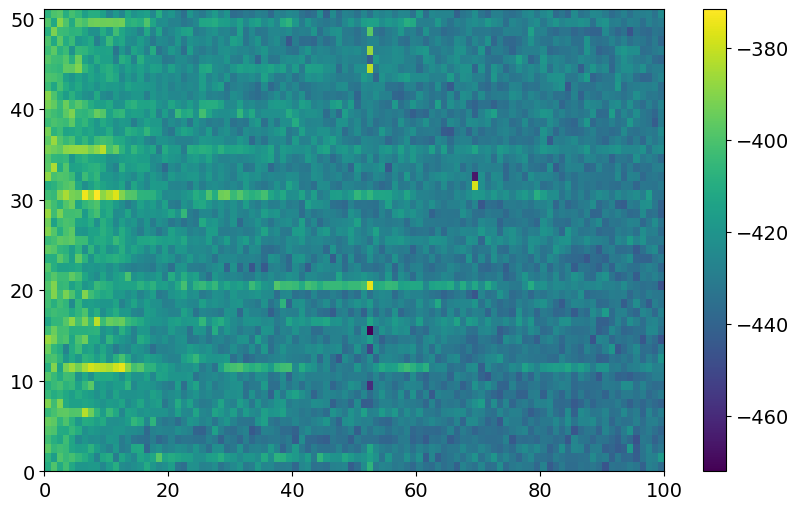

In [118]:
plt.pcolormesh(avgis)
plt.colorbar()

100%|█████████████████████████████████████████| 20/20 [01:41<00:00,  5.08s/it]


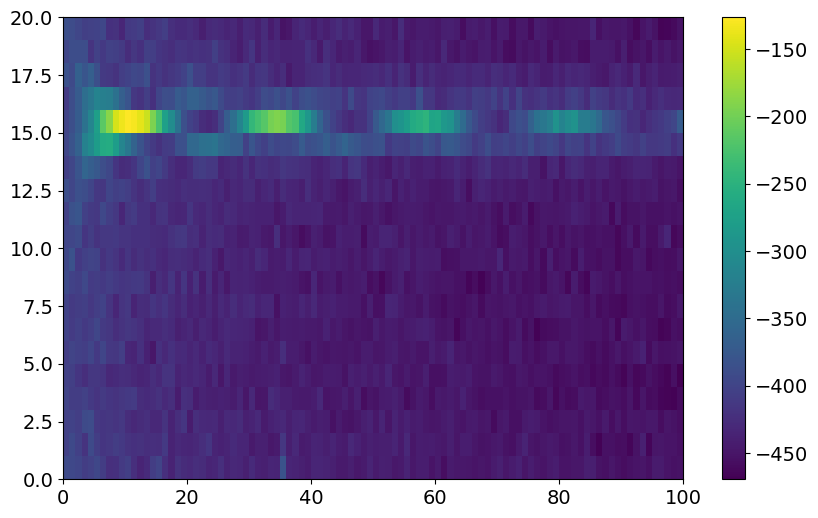

In [98]:
ss = []

for idx in tqdm(range(0,20)):
    fname = f'{idx:05d}_SidebandScramble_S4_to_S0.h5'
    ss.append(SidebandScrambleExperiment(path=expt_path, config_file=fname))

for s in ss:
    s.data = s.load_data(s.datafile())

avgis = np.array([s.data['avgi'] for s in ss])
plt.pcolormesh(avgis)
plt.colorbar()

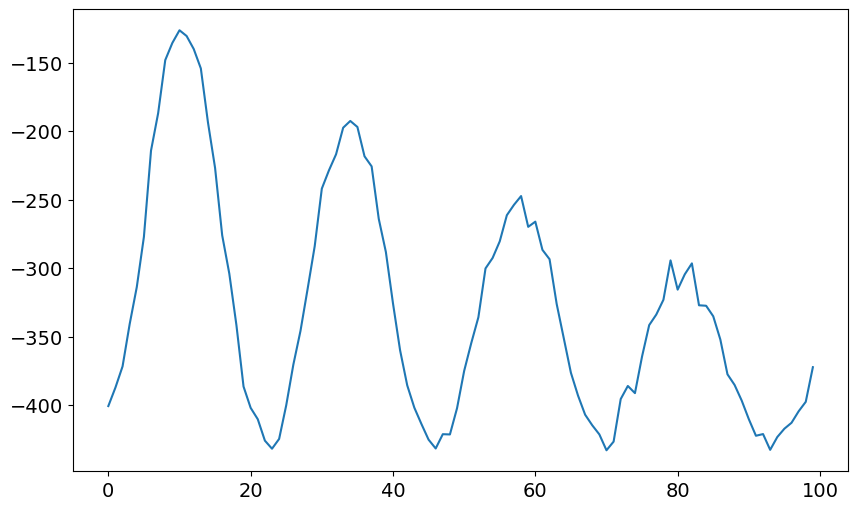

In [99]:
plt.plot(avgis[15])

## AC Stark shift

### Amplitude rabi

In [12]:
from multimode_expts.experiments.qsim.sideband_amp_rabi import SidebandAmpRabiExperiment

importing from path  C:\Users\cnhaj\Code\multimode_expts\experiments\fitting.py
imported experiments.fitting
importing from path  C:\Users\cnhaj\Code\multimode_expts\experiments\qsim
imported experiments.qsim.floquet_general
imported experiments.qsim.qsim_base
imported experiments.qsim.qsim_experiments
imported experiments.qsim.sideband_amp_rabi
imported experiments.qsim.sideband_ramsey
imported experiments.qsim.sideband_ramsey_scramble
imported experiments.qsim.sideband_scramble
imported experiments.qsim.sideband_stark
imported experiments.qsim.utils
importing from path  C:\Users\cnhaj\Code\multimode_expts\experiments\qubit_cavity
imported experiments.qubit_cavity.amplitude_rabi_f0g1
imported experiments.qubit_cavity.displacement_enhanced_sideband
imported experiments.qubit_cavity.displace_amplitude_calibration
imported experiments.qubit_cavity.displace_pulse_probe
imported experiments.qubit_cavity.ecd
imported experiments.qubit_cavity.ecd_backup
imported experiments.qubit_cavity.ecd_

Could not load config.


Traceback (most recent call last):
  File "C:\Users\cnhaj\Code\slab\experiment.py", line 79, in load_config
    if inst in self.im:
               ^^^^^^^
AttributeError: 'SidebandAmpRabiExperiment' object has no attribute 'im'


Couldn't get x and y labels automatially: 'AttrDict' object has no attribute 'swept_params'


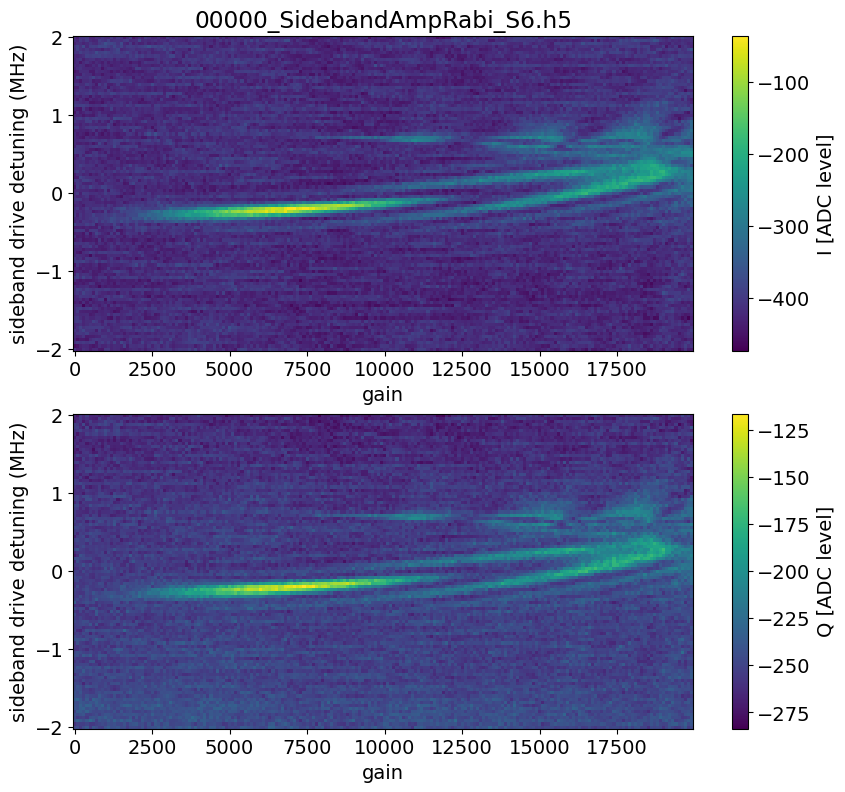

In [28]:
fname = '00000_SidebandAmpRabi_S6.h5'
s = SidebandAmpRabiExperiment(path=expt_path, config_file=fname)
s.data = s.load_data(s.datafile())

fig, axs = s.display()
for ax in axs:
    ax.set_xlabel('gain')
    ax.set_ylabel('sideband drive detuning (MHz)')

### Extracting stark shift phase correction

In [10]:
from multimode_expts.experiments.qsim.sideband_stark import SidebandStarkExperiment

importing from path  C:\_Lib\python\multimode_expts\experiments\fitting.py
imported experiments.fitting
importing from path  C:\_Lib\python\multimode_expts\experiments\qsim
imported experiments.qsim.deprecated
imported experiments.qsim.floquet_chevron
imported experiments.qsim.floquet_offdiag_phasecal
imported experiments.qsim.qsim_base
imported experiments.qsim.sideband_amp_rabi
imported experiments.qsim.sideband_ramsey
imported experiments.qsim.sideband_scramble
imported experiments.qsim.sideband_stark
imported experiments.qsim.utils
importing from path  C:\_Lib\python\multimode_expts\experiments\qubit_cavity
imported experiments.qubit_cavity.amplitude_rabi_f0g1
imported experiments.qubit_cavity.displacement_enhanced_sideband
imported experiments.qubit_cavity.displace_amplitude_calibration
imported experiments.qubit_cavity.displace_pulse_probe
imported experiments.qubit_cavity.ecd
imported experiments.qubit_cavity.ecd_backup
imported experiments.qubit_cavity.ecd_read_spec
imported ex

In [19]:
expt_path = r'H:\Shared drives\SLab\Multimode\experiment\250708_qsim\data'

In [51]:
fnames = [
    '00010_SidebandStark_S1.h5',
    '00004_SidebandStark_S2.h5',
    '00000_SidebandStark_S3.h5',
    '00000_SidebandStark_S4.h5',
    '00002_SidebandStark_S5.h5',
    '00000_SidebandStark_S6.h5',
    '00000_SidebandStark_S7.h5',
]

In [53]:
s = SidebandStarkExperiment(path=expt_path, config_file=fnames[1])
s.data = s.load_data(s.datafile())

AC Stark freq: 0.185160MHz


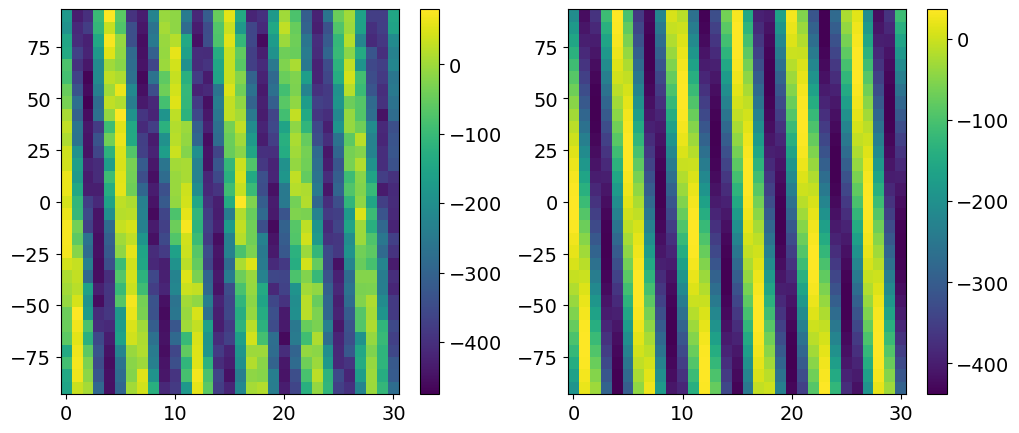

In [54]:
s.analyze()
s.fit_result

### Extracting off diagonal stark shift phase correction (coarse)

In [16]:
from multimode_expts.experiments.qsim.floquet_offdiag_phasecal import FloquetPhaseCalExperiment

importing from path  /Users/wgz/Code/multimode_expts/experiments/single_qubit
imported experiments.single_qubit.sideband_t1_general
imported experiments.single_qubit.amplitude_rabi_ef
imported experiments.single_qubit.amplitude_rabi_f0g1_general
imported experiments.single_qubit.parity_freq
imported experiments.single_qubit.parity_gain
imported experiments.single_qubit.length_rabi_f0g1_general
imported experiments.single_qubit.active_reset_single_shot
imported experiments.single_qubit.t2_echo
imported experiments.single_qubit.rf_flux_spectroscopy_f0g1
imported experiments.single_qubit.square_pulse
imported experiments.single_qubit.t1
imported experiments.single_qubit.t1_fluxonium
imported experiments.single_qubit.parity_measurement_temp
imported experiments.single_qubit.rbam
imported experiments.single_qubit.ramsey_ef
imported experiments.single_qubit.dragpulse_calibration
imported experiments.single_qubit.rb_BSgate
imported experiments.single_qubit.parity_delay
imported experiments.si

In [15]:
expt_path = os.path.join(parent_path, '250812_qsim', 'data')

In [13]:
fnames = [
    '00001_FloquetPhaseCal_S0.h5',
    '00000_FloquetPhaseCal_1on2_via3.h5',
    '00000_FloquetPhaseCal_3on1_via2.h5',
    '00000_FloquetPhaseCal_1on3_via2.h5',
    '00000_FloquetPhaseCal_3on2_via1.h5',
    '00000_FloquetPhaseCal_2on3_via1.h5',
]

In [17]:
s = FloquetPhaseCalExperiment(path=expt_path, config_file=fnames[3])
s.data = s.load_data(s.datafile())

Could not load config.


Traceback (most recent call last):
  File "/Users/wgz/Code/slab/experiment.py", line 78, in load_config
    for alias, inst in self.cfg['aliases'].items():
                       ~~~~~~~~^^^^^^^^^^^
  File "/Users/wgz/Code/slab/datamanagement.py", line 547, in __getitem__
    v=super().__getitem__(key)
      ^^^^^^^^^^^^^^^^^^^^^^^^
KeyError: 'aliases'


AC Stark freq: -0.053216MHz


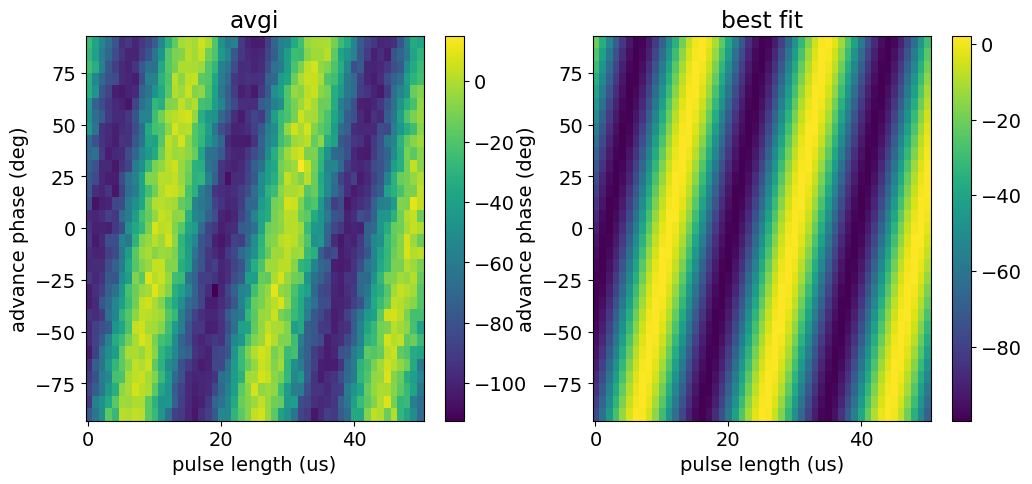

In [18]:
s.analyze()
s.fit_result

### Extracting off diagonal stark shift phase correction (coarse)

In [62]:
from multimode_expts.experiments.qsim.sideband_stark import SidebandStarkAmplificationExperiment

In [63]:
expt_path = os.path.join(parent_path, '250812_qsim', 'data')

In [69]:
fnames = [
    '00001_SidebandStarkAmplification_S2_S7.h5',
    '00000_SidebandStarkAmplification_S7_S2.h5',
    '00000_SidebandStarkAmplification_S3_S7.h5',
    '00000_SidebandStarkAmplification_S7_S3.h5',
    '00002_SidebandStarkAmplification_S2_S3.h5',
    '00002_SidebandStarkAmplification_S3_S2.h5',
    '00003_SidebandStarkAmplification_S1_S2.h5',
    '00002_SidebandStarkAmplification_S2_S1.h5',
]

In [72]:
s = SidebandStarkAmplificationExperiment(path=expt_path, config_file=fnames[7])
s.data = s.load_data(s.datafile(read_mode=True))

Could not load config.


Traceback (most recent call last):
  File "/Users/wgz/Code/slab/experiment.py", line 79, in load_config
    if inst in self.im:
               ^^^^^^^
AttributeError: 'SidebandStarkAmplificationExperiment' object has no attribute 'im'


fitparams [np.float64(-0.0008186911446716725), np.float64(1.0008186911446717), np.float64(-2.0), np.float64(2.0)]


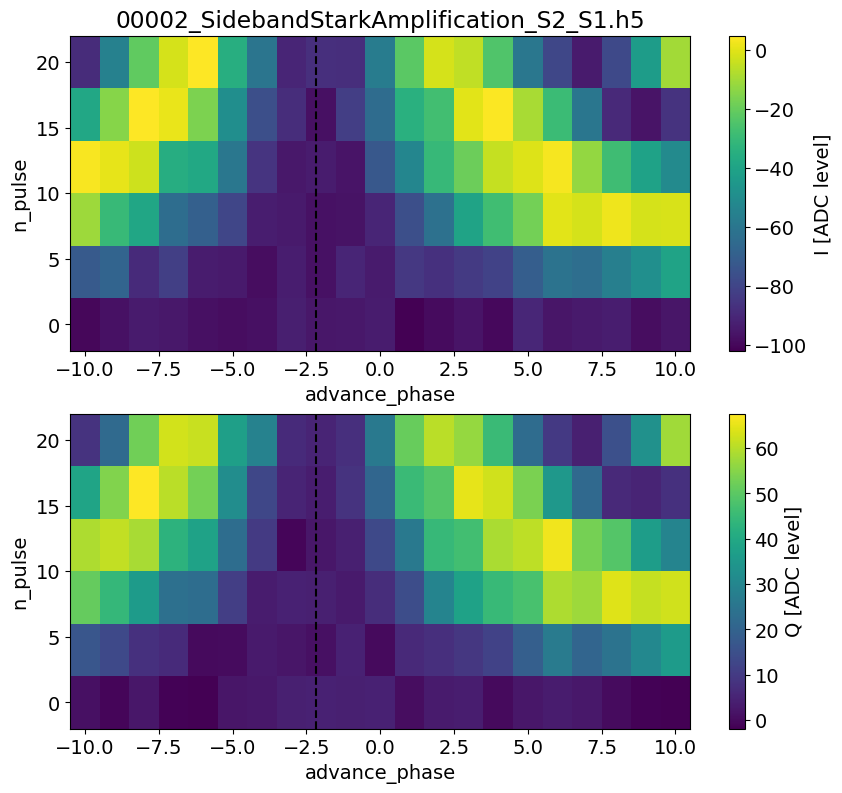

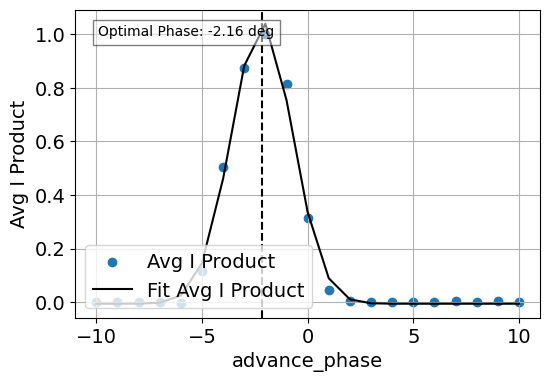

In [73]:
s.analyze()
fig, axs = s.display(fit=True)

## Quantum walk

In [19]:
expt_path = os.path.join(parent_path, '250708_qsim', 'data')

Text(0, 0.5, 'avgi')

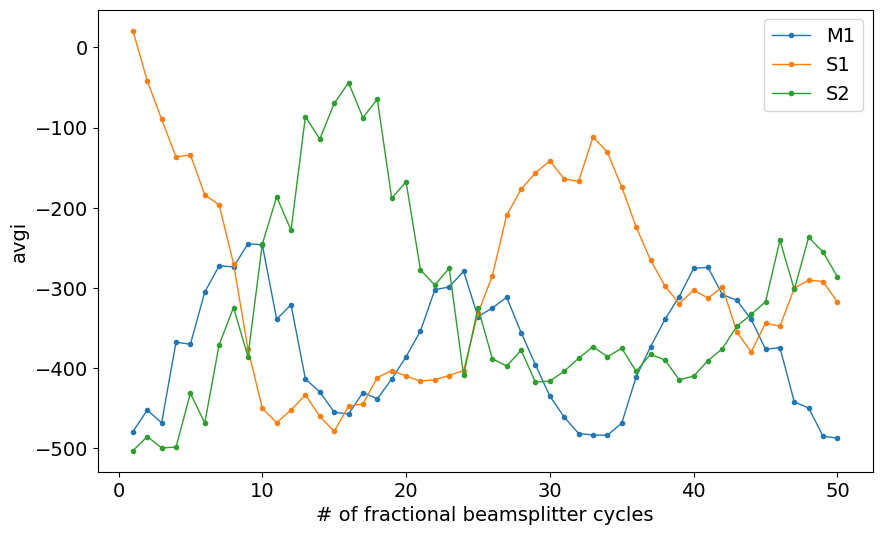

In [20]:
temp_data, attrs = prev_data(expt_path, f'00036_SidebandScramble_S1_to_S0.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, marker='.', label='M1')
temp_data, attrs = prev_data(expt_path, f'00001_SidebandScramble_S1_to_S1.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, marker='.', label='S1')
temp_data, attrs = prev_data(expt_path, f'00001_SidebandScramble_S1_to_S2.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, marker='.', label='S2')
plt.legend()
plt.xlabel('# of fractional beamsplitter cycles')
plt.ylabel('avgi')

In [21]:
expt_path = os.path.join(parent_path, '250812_qsim', 'data')

In [9]:
expt_path = r'H:\Shared drives\SLab\Multimode\experiment\250708_qsim\data'

In [ ]:
temp_data, attrs = prev_data(expt_path, f'00004_SidebandScramble_S1_to_S0.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, marker='.', label='M1')
temp_data, attrs = prev_data(expt_path, f'00006_SidebandScramble_S1_to_S1.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, marker='.', label='S1')
temp_data, attrs = prev_data(expt_path, f'00005_SidebandScramble_S1_to_S2.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, marker='.', label='S2')

temp_data, attrs = prev_data(expt_path, f'00001_StorageT1_S0.h5')
plt.plot(temp_data['xpts']/0.62, temp_data['avgi'], lw=1, ls='--', label='M1 T1')
plt.legend()
plt.xlabel('# of fractional beamsplitter cycles')
plt.ylabel('avgi')
plt.xlim(0,200)

Text(0, 0.5, 'avgi')

### 3 site

In [23]:
expt_path = os.path.join(parent_path, '250812_qsim', 'data')

update phase: false

Text(0, 0.5, 'avgi')

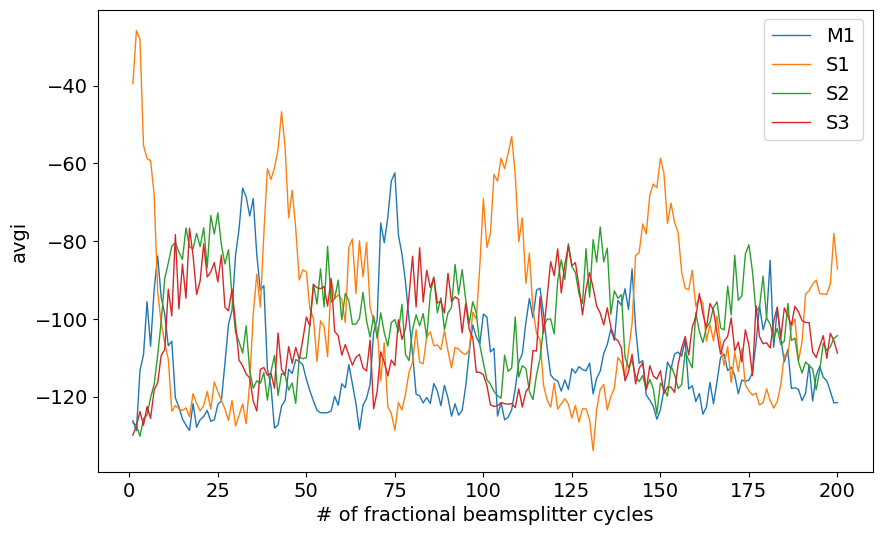

In [25]:
temp_data, attrs = prev_data(expt_path, f'00005_SidebandScramble_S1_to_S0.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='M1')
temp_data, attrs = prev_data(expt_path, f'00007_SidebandScramble_S1_to_S1.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S1')
temp_data, attrs = prev_data(expt_path, f'00006_SidebandScramble_S1_to_S2.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S2')
temp_data, attrs = prev_data(expt_path, f'00000_SidebandScramble_S1_to_S3.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S3')
plt.legend()
plt.xlabel('# of fractional beamsplitter cycles')
plt.ylabel('avgi')

### Compare decay with $T_1$

(0.0, 200.0)

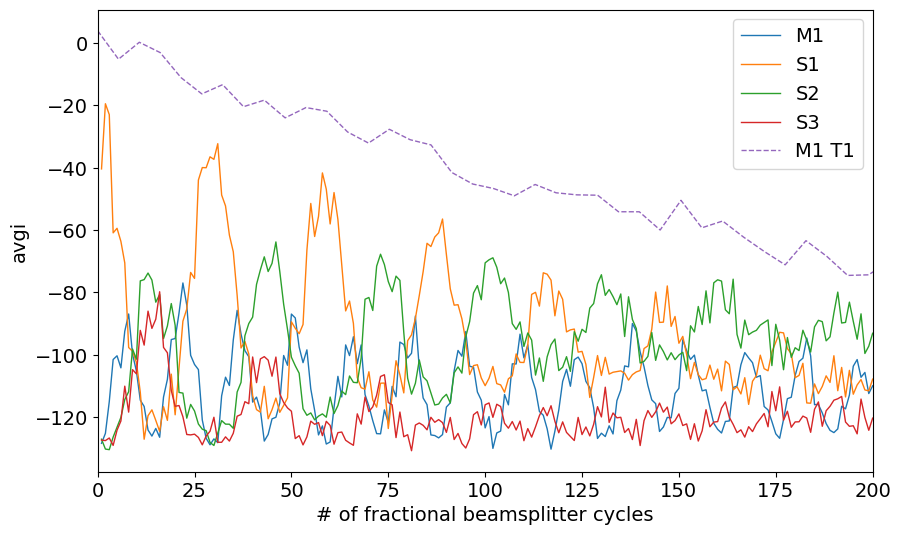

In [26]:
temp_data, attrs = prev_data(expt_path, f'00006_SidebandScramble_S1_to_S0.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='M1')
temp_data, attrs = prev_data(expt_path, f'00008_SidebandScramble_S1_to_S1.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S1')
temp_data, attrs = prev_data(expt_path, f'00007_SidebandScramble_S1_to_S2.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S2')
temp_data, attrs = prev_data(expt_path, f'00001_SidebandScramble_S1_to_S3.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S3')

temp_data, attrs = prev_data(expt_path, f'00001_StorageT1_S0.h5')
plt.plot(temp_data['xpts']/0.93, temp_data['avgi'], lw=1, ls='--', label='M1 T1')
plt.legend()
plt.xlabel('# of fractional beamsplitter cycles')
plt.ylabel('avgi')
plt.xlim(0,200)

S2 S3 S7 using pi/12, -pi/12 err amp

(0.0, 100.0)

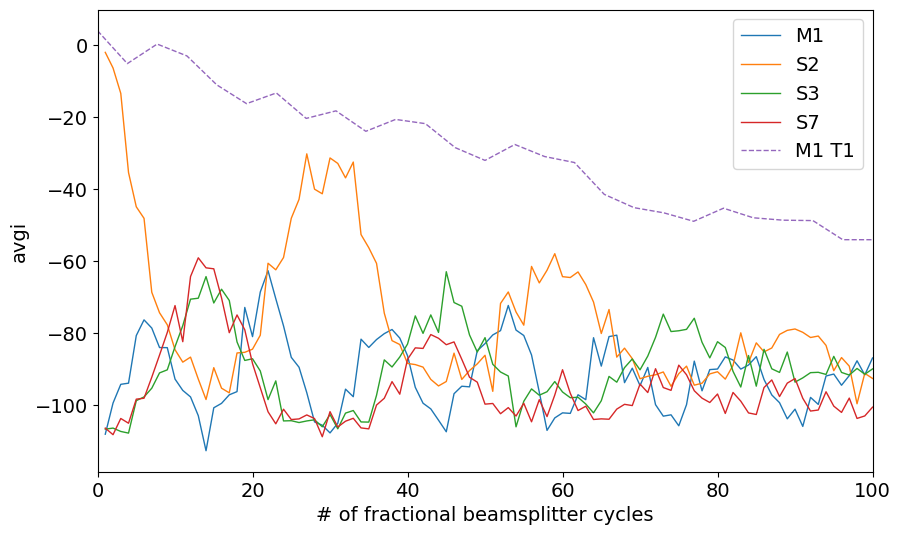

In [75]:
temp_data, attrs = prev_data(expt_path, f'00002_SidebandScramble_S2_to_S0.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='M1')
temp_data, attrs = prev_data(expt_path, f'00002_SidebandScramble_S2_to_S2.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S2')
temp_data, attrs = prev_data(expt_path, f'00001_SidebandScramble_S2_to_S3.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S3')
temp_data, attrs = prev_data(expt_path, f'00000_SidebandScramble_S2_to_S7.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S7')

temp_data, attrs = prev_data(expt_path, f'00001_StorageT1_S0.h5')
plt.plot(temp_data['xpts']/1.3, temp_data['avgi'], lw=1, ls='--', label='M1 T1')
plt.legend()
plt.xlabel('# of fractional beamsplitter cycles')
plt.ylabel('avgi')
plt.xlim(0,100)

S2 S3 S7 using 2D err amp

(0.0, 100.0)

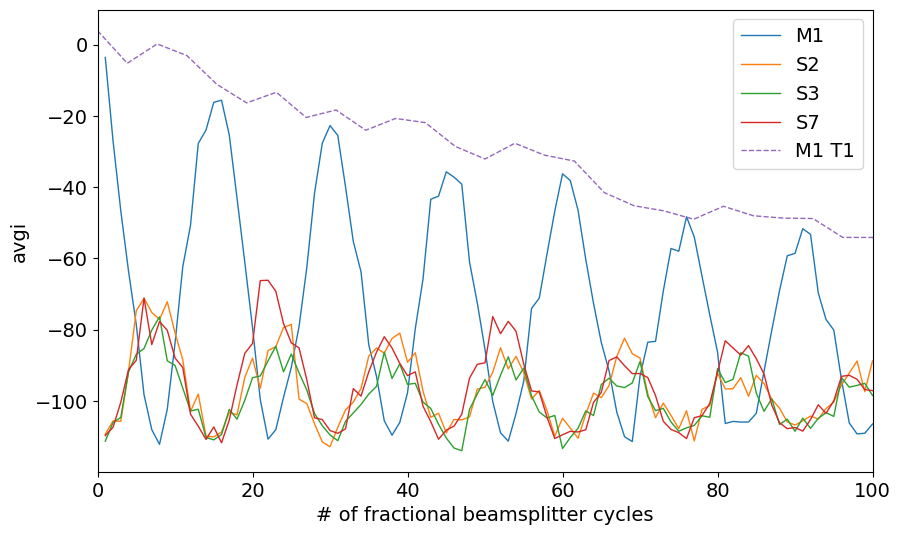

In [82]:
temp_data, attrs = prev_data(expt_path, f'00000_SidebandScramble_S0_to_S0.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='M1')
temp_data, attrs = prev_data(expt_path, f'00000_SidebandScramble_S0_to_S2.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S2')
temp_data, attrs = prev_data(expt_path, f'00000_SidebandScramble_S0_to_S3.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S3')
temp_data, attrs = prev_data(expt_path, f'00000_SidebandScramble_S0_to_S7.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S7')

temp_data, attrs = prev_data(expt_path, f'00001_StorageT1_S0.h5')
plt.plot(temp_data['xpts']/1.3, temp_data['avgi'], lw=1, ls='--', label='M1 T1')
plt.legend()
plt.xlabel('# of fractional beamsplitter cycles')
plt.ylabel('avgi')
plt.xlim(0,100)

(0.0, 100.0)

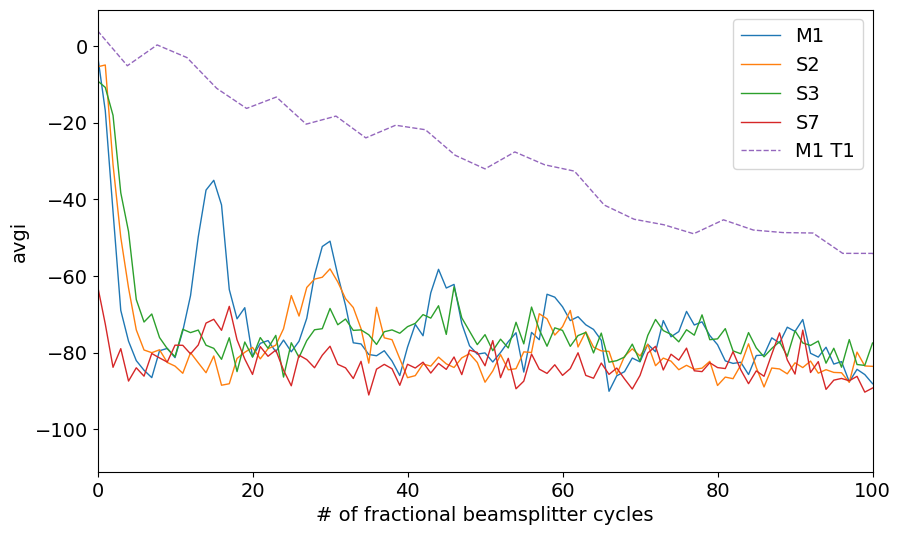

In [90]:
temp_data, attrs = prev_data(expt_path, f'00005_SidebandScramble_S[2, 3, 0]_to_S0.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='M1')
temp_data, attrs = prev_data(expt_path, f'00005_SidebandScramble_S[2, 3, 0]_to_S2.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S2')
temp_data, attrs = prev_data(expt_path, f'00004_SidebandScramble_S[2, 3, 0]_to_S3.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S3')
temp_data, attrs = prev_data(expt_path, f'00003_SidebandScramble_S[2, 3, 0]_to_S7.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S7')

temp_data, attrs = prev_data(expt_path, f'00001_StorageT1_S0.h5')
plt.plot(temp_data['xpts']/1.3, temp_data['avgi'], lw=1, ls='--', label='M1 T1')
plt.legend()
plt.xlabel('# of fractional beamsplitter cycles')
plt.ylabel('avgi')
plt.xlim(0,100)

S2 S3 S7 no phase update

(0.0, 100.0)

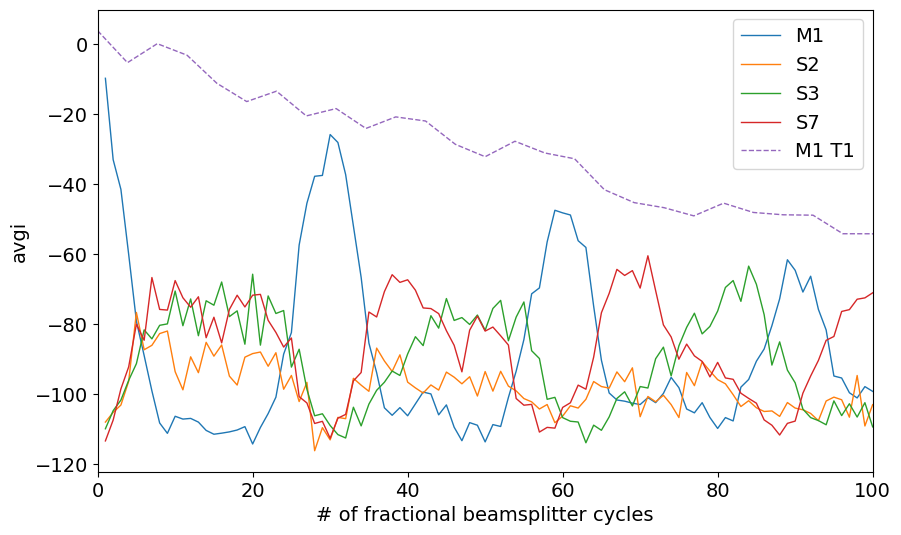

In [84]:
temp_data, attrs = prev_data(expt_path, f'00001_SidebandScramble_S0_to_S0.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='M1')
temp_data, attrs = prev_data(expt_path, f'00001_SidebandScramble_S0_to_S2.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S2')
temp_data, attrs = prev_data(expt_path, f'00001_SidebandScramble_S0_to_S3.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S3')
temp_data, attrs = prev_data(expt_path, f'00001_SidebandScramble_S0_to_S7.h5')
plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='S7')

temp_data, attrs = prev_data(expt_path, f'00001_StorageT1_S0.h5')
plt.plot(temp_data['xpts']/1.3, temp_data['avgi'], lw=1, ls='--', label='M1 T1')
plt.legend()
plt.xlabel('# of fractional beamsplitter cycles')
plt.ylabel('avgi')
plt.xlim(0,100)

In [ ]:

plt.plot(temp_data['xpts'], temp_data['avgi'], lw=1, label='M1')
plt.legend()
plt.xlabel('# of fractional beamsplitter cycles')
plt.ylabel('avgi')

### 2 site varying phase

In [ ]:
from multimode_expts.experiments.qsim.qsim_base import QsimBaseExperiment

In [46]:
expt_path = os.path.join(parent_path, '250812_qsim', 'data')

Could not load config.


Traceback (most recent call last):
  File "/Users/wgz/Code/slab/experiment.py", line 79, in load_config
    if inst in self.im:
               ^^^^^^^
AttributeError: 'QsimBaseExperiment' object has no attribute 'im'


(<Figure size 1000x900 with 4 Axes>,
 array([<Axes: title={'center': '00010_SidebandScramble_S1_to_S2.h5'}, xlabel='floquet_cycle', ylabel='advance_phase'>,
        <Axes: xlabel='floquet_cycle', ylabel='advance_phase'>],
       dtype=object))

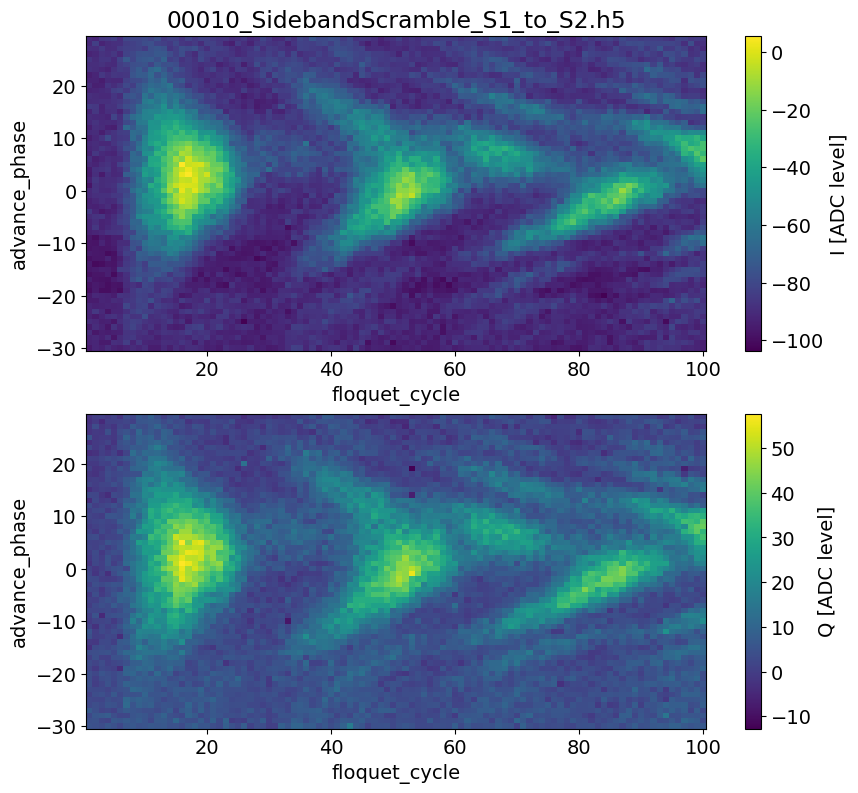

In [109]:
s = QsimBaseExperiment(path=expt_path, config_file='00010_SidebandScramble_S1_to_S2.h5')
s.data = s.load_data(s.datafile(read_mode=True))
s.display()

### storA storB phase error amp

In [14]:
from multimode_expts.experiments.qsim.sideband_scramble import FloquetCalibrationAmplificationExperiment

importing from path  /Users/wgz/Code/multimode_expts/experiments/single_qubit
imported experiments.single_qubit.sideband_t1_general
imported experiments.single_qubit.amplitude_rabi_ef
imported experiments.single_qubit.amplitude_rabi_f0g1_general
imported experiments.single_qubit.parity_freq
imported experiments.single_qubit.parity_gain
imported experiments.single_qubit.length_rabi_f0g1_general
imported experiments.single_qubit.active_reset_single_shot
imported experiments.single_qubit.t2_echo
imported experiments.single_qubit.rf_flux_spectroscopy_f0g1
imported experiments.single_qubit.square_pulse
imported experiments.single_qubit.t1
imported experiments.single_qubit.t1_fluxonium
imported experiments.single_qubit.parity_measurement_temp
imported experiments.single_qubit.rbam
imported experiments.single_qubit.ramsey_ef
imported experiments.single_qubit.dragpulse_calibration
imported experiments.single_qubit.rb_BSgate
imported experiments.single_qubit.parity_delay
imported experiments.si

In [15]:
expt_path = os.path.join(parent_path, '250812_qsim', 'data')

In [38]:
fnames = [
    '00008_FloquetCalibrationAmplificationExperiment_S1_S2.h5',
    '00002_FloquetCalibrationAmplificationExperiment_S2_S3.h5',
    '00003_FloquetCalibrationAmplificationExperiment_S1_S3.h5',
    '00000_FloquetCalibrationAmplificationExperiment_S2_S7.h5',
    '00000_FloquetCalibrationAmplificationExperiment_S3_S7.h5',
]

In [50]:
s = FloquetCalibrationAmplificationExperiment(path=expt_path, config_file=fnames[3])
s.data = s.load_data(s.datafile(read_mode=True))

Could not load config.


Traceback (most recent call last):
  File "/Users/wgz/Code/slab/experiment.py", line 79, in load_config
    if inst in self.im:
               ^^^^^^^
AttributeError: 'FloquetCalibrationAmplificationExperiment' object has no attribute 'im'


fitparams [np.float64(-0.002907169335964142), np.float64(0.10023231229426481), np.float64(-1.5), np.float64(3.0)]
fitparams [np.float64(-0.010437192631130209), np.float64(0.20379533742031244), np.float64(-12.5), np.float64(3.0)]
x center: 1.038950 (err: 0.128865)
y center: -12.394362 (err: 0.021669)


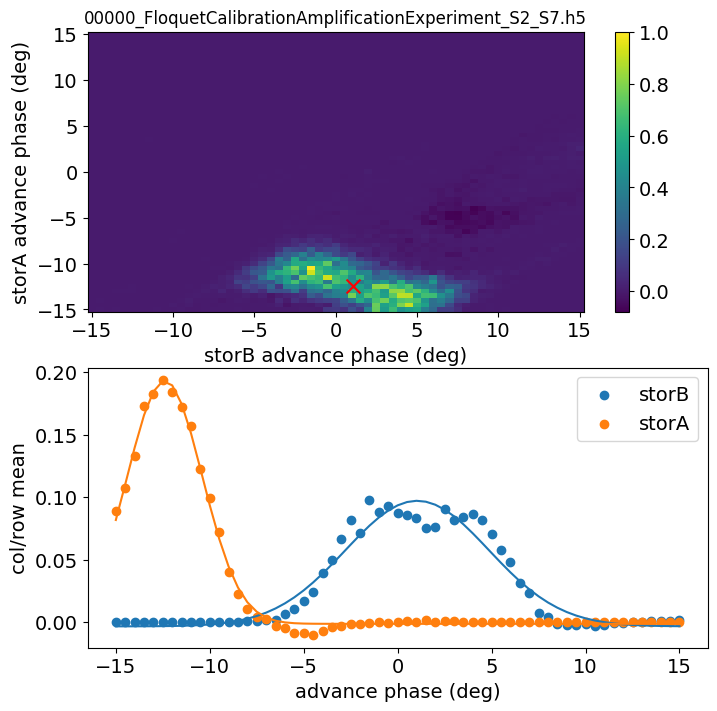

In [53]:
s.analyze(state_fin='e', fit_model='sg')

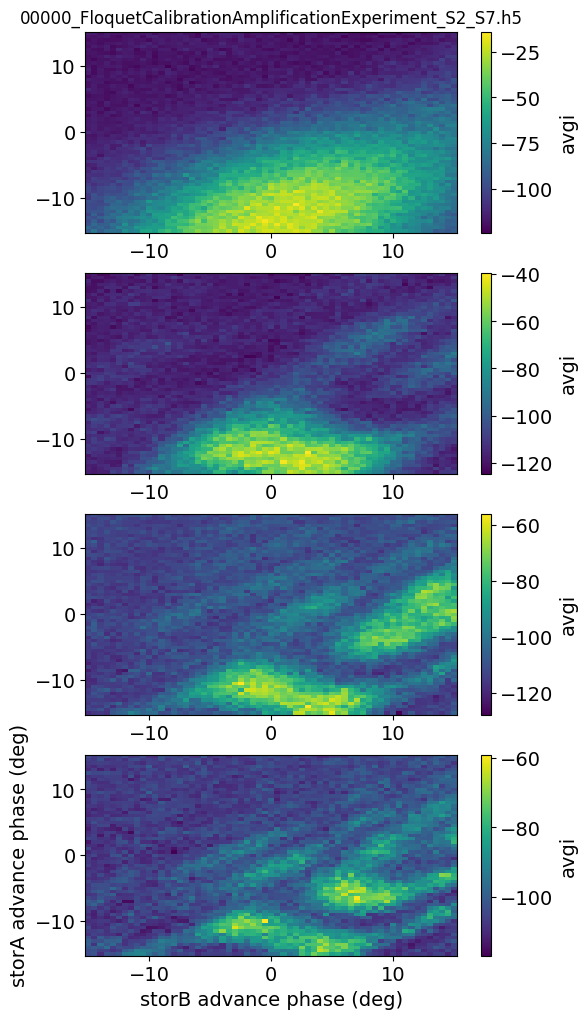

In [54]:
fig, axs = s.display()
axs[0].scatter([s.data['xproj_popts'][2]], [s.data['yproj_popts'][2]], marker='x', color='r', s=100)


In [ ]:
temp_data, attrs = prev_data(expt_path, f'00008_FloquetCalibrationAmplificationExperiment_S1_S2.h5')

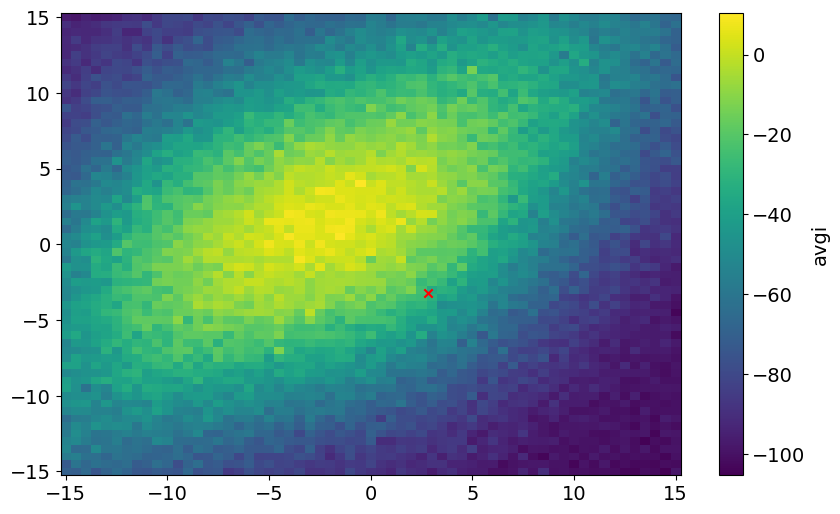

In [ ]:
plt.pcolormesh(temp_data['xpts'][0], temp_data['ypts'][0], temp_data['avgi'][0])
plt.colorbar(label='avgi')
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
plt.scatter([2.8],[-3.2], marker='x', color='r')

# Scratchpad

## Quick view any data

In [27]:
expt_path = os.path.join(parent_path, '250506_qsim', 'data')

In [28]:
temp_data, attrs = prev_data(expt_path, f'00002_SidebandStark_S1.h5')

In [29]:
temp_data.keys()

dict_keys(['amps', 'avgi', 'avgq', 'idata', 'phases', 'qdata', 'xpts', 'ypts'])

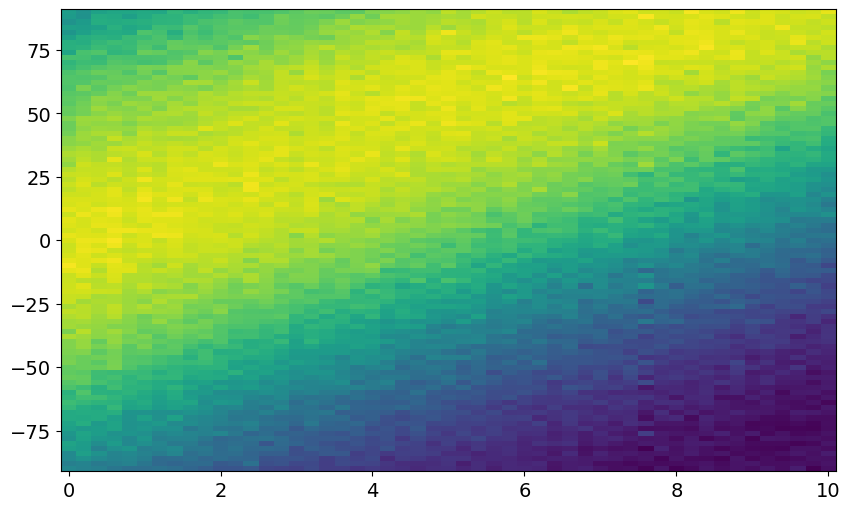

In [30]:
try:
    plt.pcolormesh(temp_data['xpts'], temp_data['ypts'], temp_data['avgi'])
except:
    plt.plot(temp_data['xpts'], temp_data['avgi'])

In [31]:
attrs['config']['expt'].keys()

dict_keys(['expts', 'reps', 'rounds', 'qubits', 'f0g1_cavity', 'init_stor', 'ro_stor', 'detune', 'phases', 'waits', 'swept_params', 'normalize', 'active_reset', 'man_reset', 'storage_reset', 'advance_phase', 'echoes', 'phase', 'wait'])

## View using qsim base experiment 

In [32]:
from multimode_expts.experiments.qsim.qsim_base import QsimBaseExperiment

In [34]:
expt_path = os.path.join(parent_path, '250708_qsim', 'data')

In [35]:
fnames = [
    '00031_SidebandScramble_S1_to_S0.h5',
]

In [ ]:
s = QsimBaseExperiment(path=expt_path, config_file=fnames[0])
s.data = s.load_data(s.datafile(read_mode=True))

Could not load config.


Traceback (most recent call last):
  File "/Users/wgz/Code/slab/experiment.py", line 79, in load_config
    if inst in self.im:
               ^^^^^^^
AttributeError: 'QsimBaseExperiment' object has no attribute 'im'


(<Figure size 1000x900 with 4 Axes>,
 array([<Axes: title={'center': '00031_SidebandScramble_S1_to_S0.h5'}, xlabel='floquet_cycle', ylabel='advance_phase'>,
        <Axes: xlabel='floquet_cycle', ylabel='advance_phase'>],
       dtype=object))

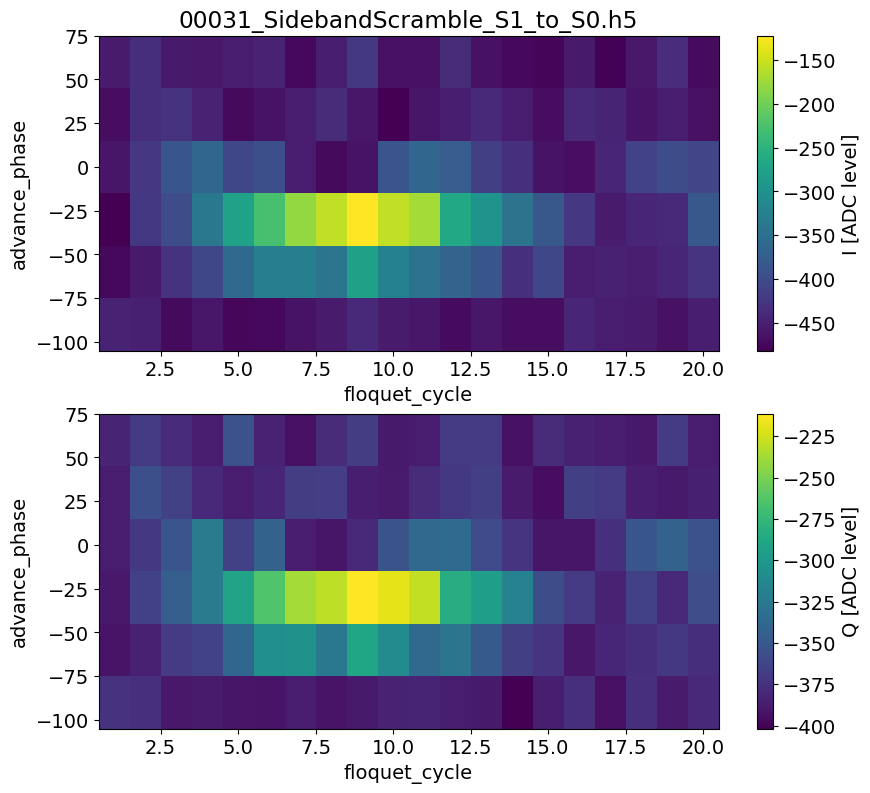

In [37]:
s.display()

## debug fitting

In [38]:
from multimode_expts.fit_display_classes import ChevronFitting

In [39]:
expt_path = os.path.join(parent_path, '250505_qsim', 'data')

In [40]:
temp_data, attrs = prev_data(expt_path, f'00017_length_rabi_f0g1_sweep.h5')

In [42]:
chevron_analysis = ChevronFitting(
    frequencies=temp_data['freq_sweep'],
    time=temp_data['xpts'][0],
    response_matrix=temp_data['avgi']
)

chevron_analysis.analyze()
chevron_analysis.display_results(save_fig=False, directory='', title='')


TypeError: ChevronFitting.display_results() got an unexpected keyword argument 'directory'

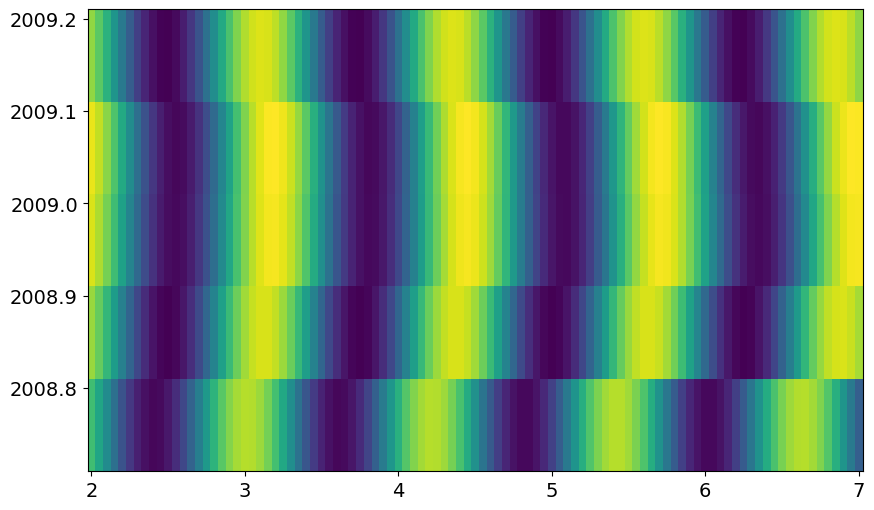

In [43]:
plt.pcolormesh(chevron_analysis.time, chevron_analysis.frequencies, chevron_analysis.best_fits)

2008.9599999999998


IndexError: list index out of range

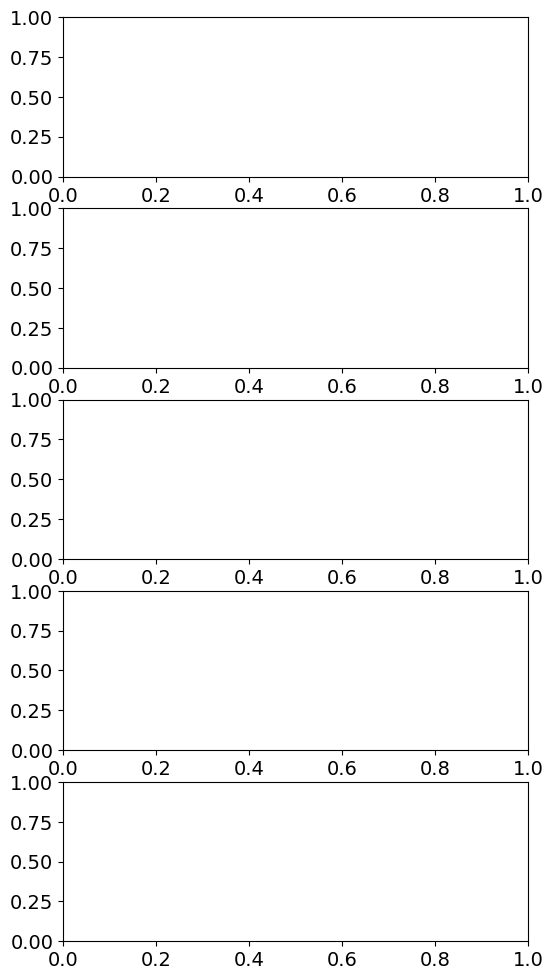

In [44]:
fig, axs = plt.subplots(5,1, figsize=(6,12))

omega_argmin = np.nanargmin([res.best_values['omega'] for res in chevron_analysis.lmfit_results])
print(chevron_analysis.frequencies[omega_argmin])

for key, ax in zip(chevron_analysis.lmfit_results[6].params.keys(), axs):
    ax.plot([res.best_values[key] for res in chevron_analysis.lmfit_results])

    ax.set_ylabel(key)

axs[1].axvline(omega_argmin, color='k', linestyle='--', label='argmin')


2008.9599999999998


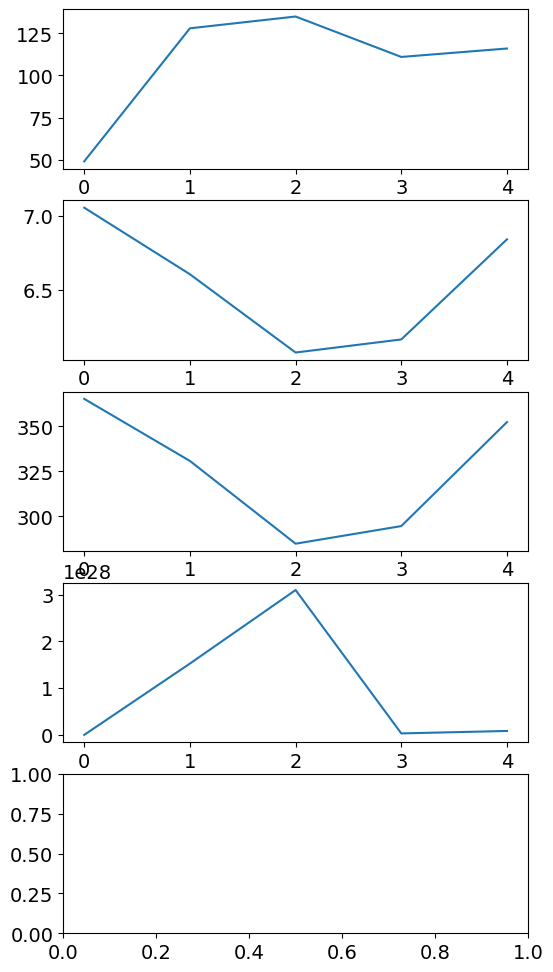

In [45]:
fig, axs = plt.subplots(5,1, figsize=(6,12))

omega_argmin = np.argmin([res.best_values['omega'] for res in chevron_analysis.lmfit_results])
print(chevron_analysis.frequencies[omega_argmin])

axs[0].plot([res.nfev for res in chevron_analysis.lmfit_results])
axs[1].plot([np.mean(res.eval_uncertainty()) for res in chevron_analysis.lmfit_results])
axs[2].plot([res.redchi for res in chevron_analysis.lmfit_results])
axs[3].plot([np.max(res.covar) for res in chevron_analysis.lmfit_results])


# axs[1].axvline(omega_argmin, color='k', linestyle='--', label='argmin')


In [34]:
current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

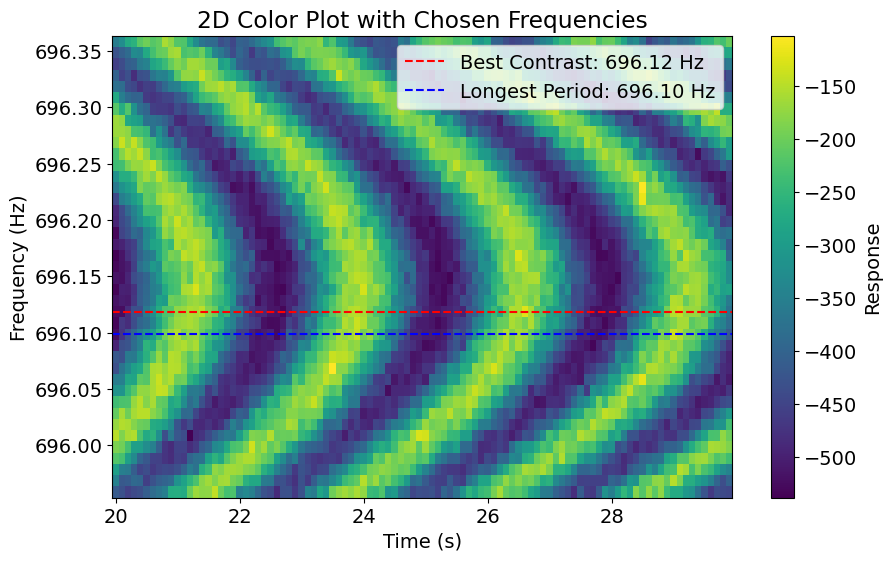

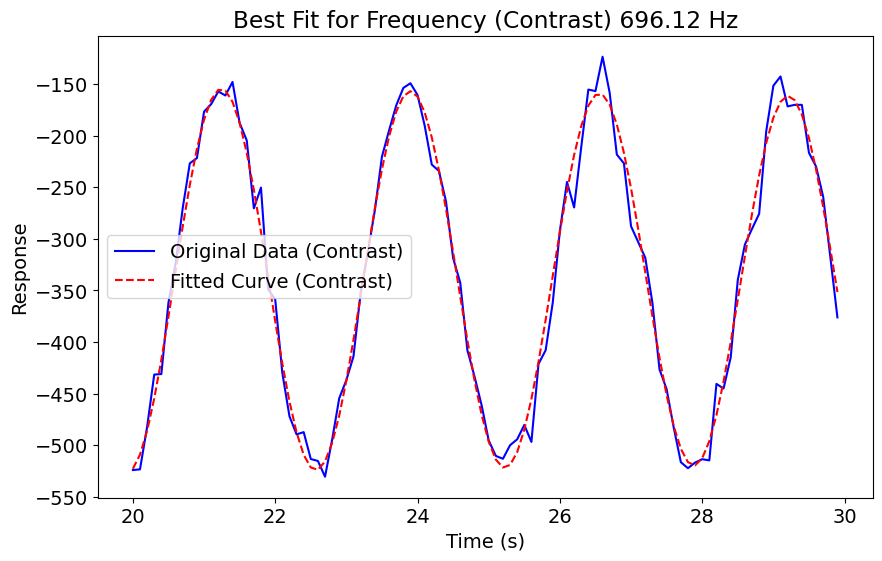

In [35]:
chevron_analysis.display_results(save_fig=False, directory='', title=f'M1-S4_{current_time}')